## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.5 MB/s eta 0:00:0000:0100:01


## 데이터 로드

In [137]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [138]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [139]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [140]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [141]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [9]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [10]:
target = df[df["Country"].isin(country_group)].copy()

In [11]:
# 전체 평균 판매금액
TotalPrice_mean = df["TotalPrice"].mean()
TotalPrice_mean

20.121871451639677

In [12]:
target.groupby("Country")["TotalPrice"].mean()

Country
Canada        24.280662
Hong Kong     55.252817
Japan        116.561900
Lebanon       37.641778
Singapore     95.852658
USA           20.002179
Name: TotalPrice, dtype: float64

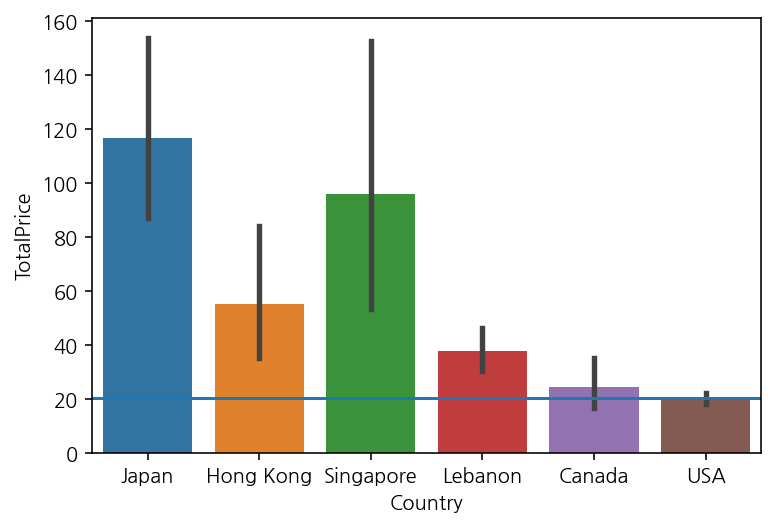

In [13]:
sns.barplot(data=target, x="Country", y="TotalPrice")
plt.axhline(TotalPrice_mean)

다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요. 또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

<AxesSubplot:xlabel='Quantity', ylabel='TotalPrice'>

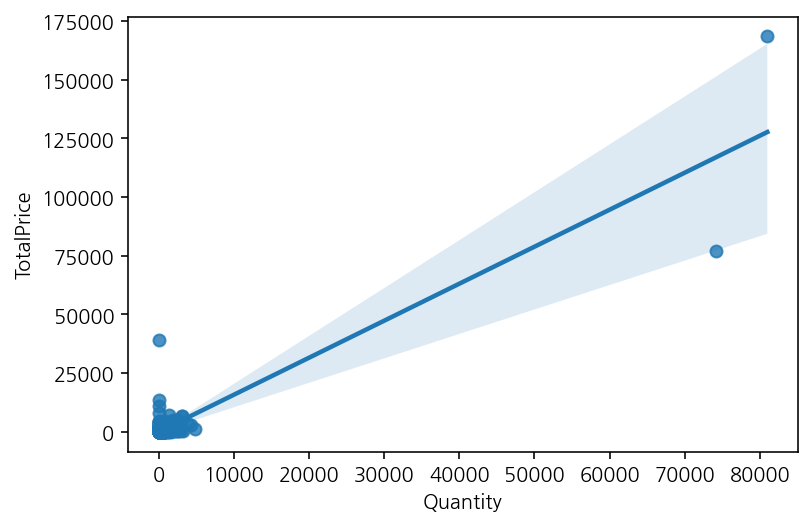

In [14]:
# 판매가격과 판매량 시각화
sns.regplot(data=df, x="Quantity", y="TotalPrice")

<AxesSubplot:xlabel='Quantity', ylabel='TotalPrice'>

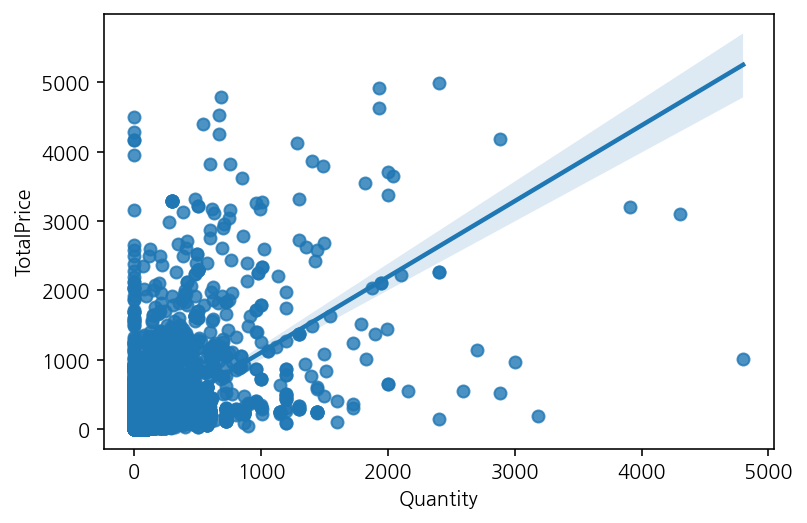

In [17]:
f_df = df[df["Quantity"] < 10000]
f_df = df[df["TotalPrice"] < 6000]

sns.regplot(data=f_df, x="Quantity", y="TotalPrice")

In [ ]:
# 이상치 제거
sns.boxplot(data=df, x="Country", y="Quantity")

In [22]:
# 전체 변수와 개별 변수 합쳐서 시각화
country_all = df.copy()
country_all["Country"] = "all"
df_all = pd.concat([country_all, target])
df_all["Country"].value_counts()

all          530104
Japan           321
Hong Kong       284
Singapore       222
USA             179
Canada          151
Lebanon          45
Name: Country, dtype: int64

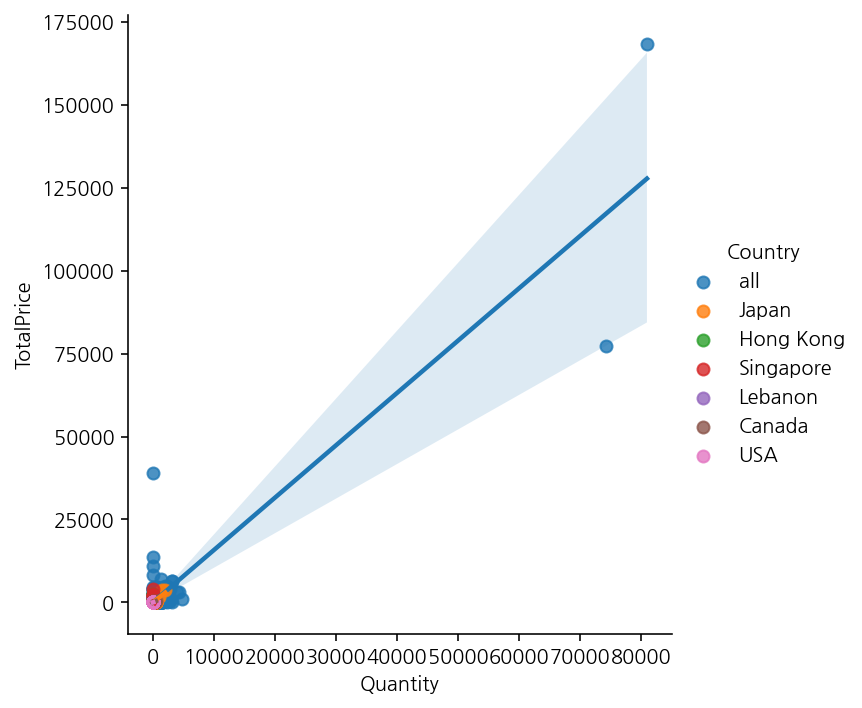

In [23]:
# 개별 변수 회귀선 시각화
sns.lmplot(data=df_all, x="Quantity", y="TotalPrice", hue="Country")

In [24]:
# 이상치 제거한 
country_all = f_df.copy()
country_all["Country"] = "all"
df_all = pd.concat([country_all, target])
df_all["Country"].value_counts()

all          530095
Japan           321
Hong Kong       284
Singapore       222
USA             179
Canada          151
Lebanon          45
Name: Country, dtype: int64

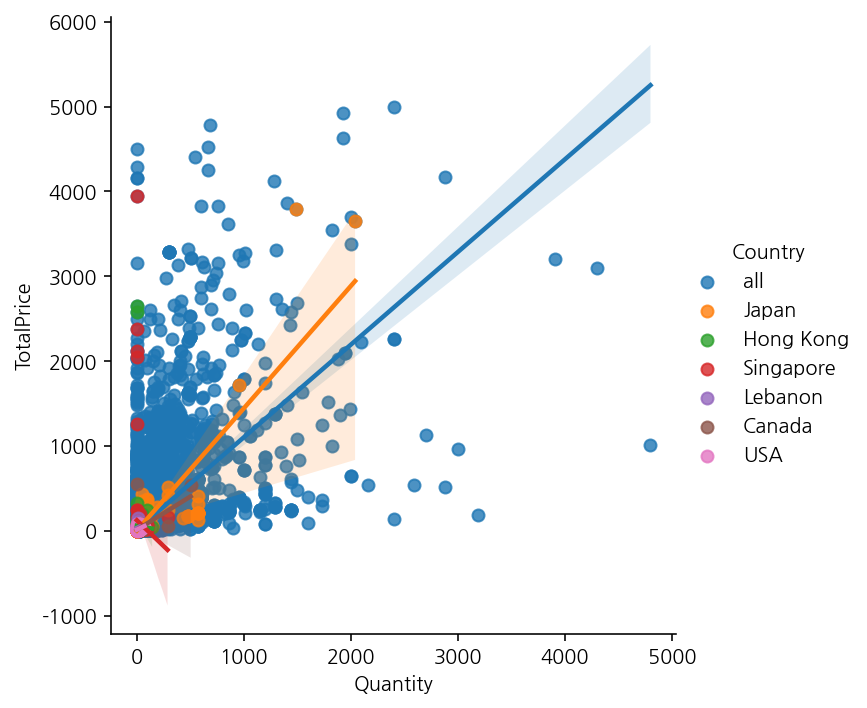

In [31]:
# 개별 변수 회귀선 시각화
sns.lmplot(data=df_all, x="Quantity", y="TotalPrice", hue="Country")

In [32]:
df_all[df_all["TotalPrice"] < 0] 
#... - 값이 없는데... 왜.. 그래프가... 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice


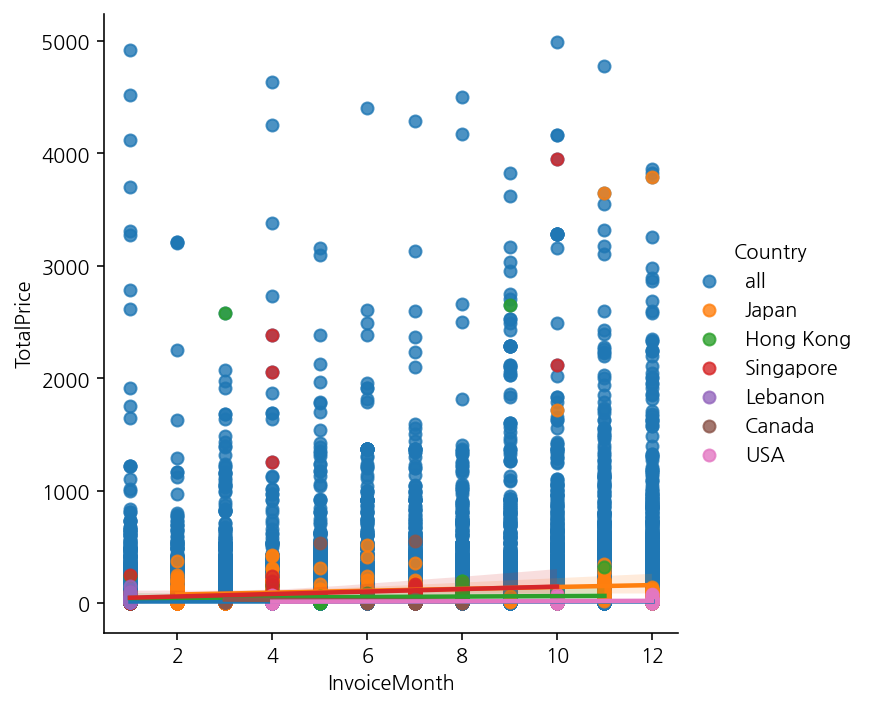

In [27]:
sns.lmplot(data=df_all, x="InvoiceMonth", y="TotalPrice", hue="Country")

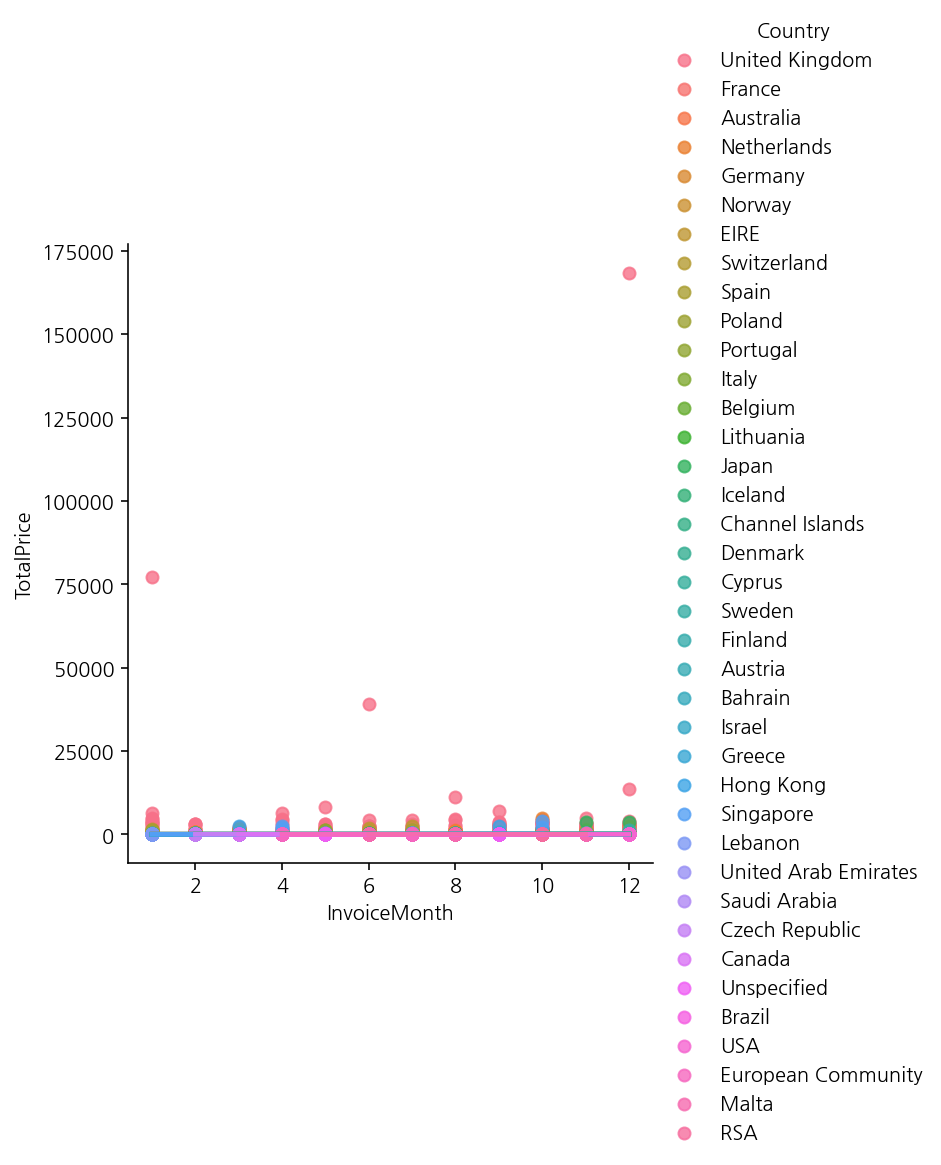

In [28]:
sns.lmplot(data=df, x="InvoiceMonth", y="TotalPrice", hue="Country")

In [ ]:
X = target.drop(columns=["Total"])

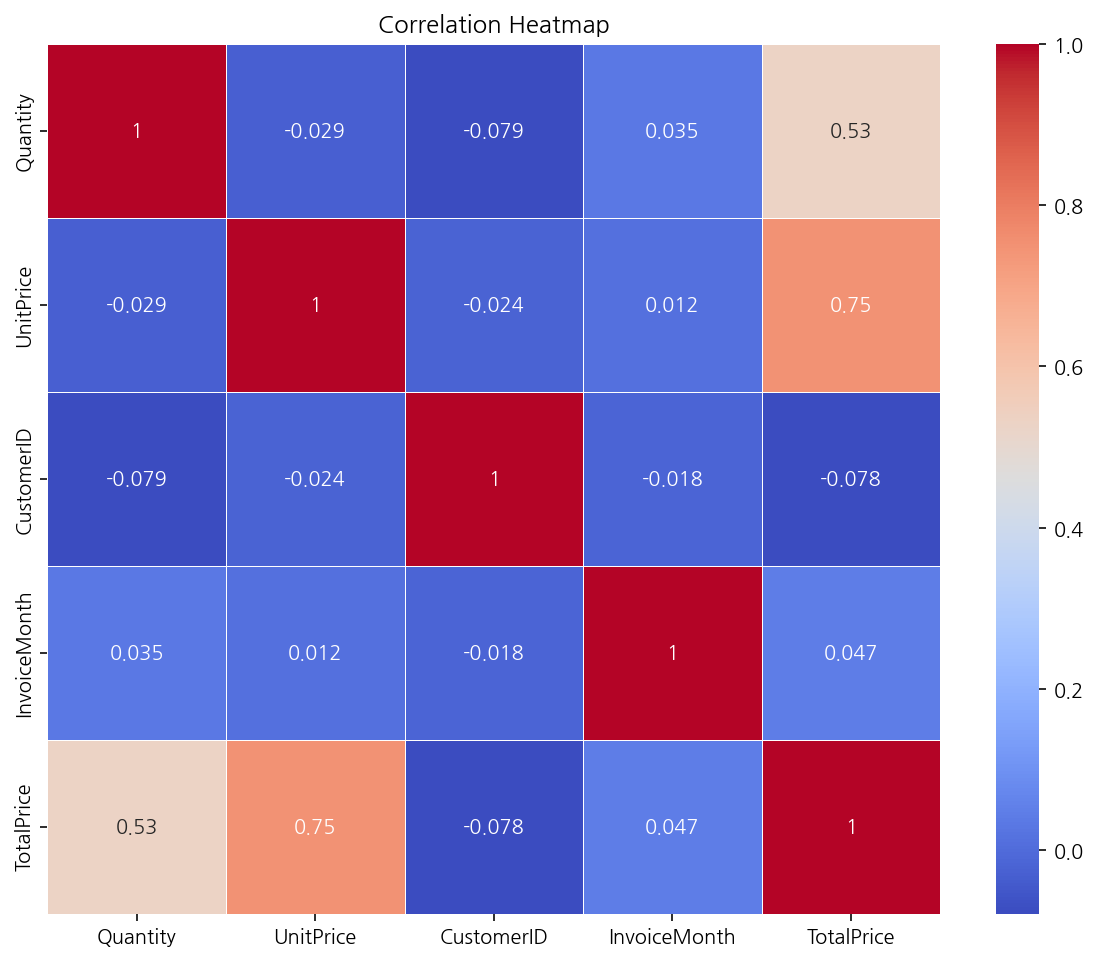

In [26]:
# 피처 간 상관관계 히트맵
correlation_matrix = target.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 미션 1 결과해석
- 심슨의 역설 
    - 데이터의 세부 그룹별로 일정한 추세나 경향성이 나타나지만, 전체적으로 보면 그 추세가 사라지거나 반대 방향의 경향성을 나타내는 현상
    - 전체적으로 수량이 올라가면 Total price도 증가하지만 세부적으로 주어진 타겟 나라만 보면 반대의 경향이 보인다
    - 또 타겟 국가에서는 12월로 갈수록 Total price가 증가하는 경향성이 아주 약간 나타나는데 전체국가로 보면 경향성이 없다

- 비즈니스 관점에서 설명
    - 이는 국가별 타겟팅을 통한 판매전략을 세워야 함을 의미한다
    - 고객피드백과 시장 분석이 필요하다
        - 특정 국가에서 판매 감소 원인 분석을 통해 제품 개선, 서비스 품질 향상, 고객 만족도 증진 등 구체적 조치 취할 수 있다
    - 재고 및 공급망 관리 최적화에 적용
    
    

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [87]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [78]:
X.shape, y.shape

((530104, 2), (530104,))

In [45]:
# 회귀모델 생성 및 적합
model = sm.OLS(y, X).fit()

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:54:45   Log-Likelihood:            -3.7156e+06
No. Observations:              530104   AIC:                         7.431e+06
Df Residuals:                  530102   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0802      0.370     43.463      0.0

- 이 모델은 UnitPrice가 TotalPrice에 미치는 영향을 어느 정도 설명하지만, 전체 변동성의 매우 작은 부분만 설명가능
- 따라서 다른 독립 변수들도 고려하거나, 다른 분석 방법을 적용하여 더 많은 변동성을 설명할 필요가 있어 보임
- 데이터의 왜도와 첨도가 매우 높아, 이상치나 비정상적인 데이터 포인트가 결과에 영향을 미쳤을 가능성이 높임

In [79]:
dfWithoutOutliers = df[np.abs(df["UnitPrice"]-df["UnitPrice"].mean())<=(3*df["UnitPrice"].std())] 

In [80]:
dfWithoutOutliers = dfWithoutOutliers[np.abs(dfWithoutOutliers["TotalPrice"]-dfWithoutOutliers["TotalPrice"].mean())<=(3*dfWithoutOutliers["TotalPrice"].std())] 

In [81]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",dfWithoutOutliers.shape)

Shape Of The Before Ouliers:  (530104, 10)
Shape Of The After Ouliers:  (528836, 10)


- 이상치 제거 후 측정

In [83]:
# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = dfWithoutOutliers['UnitPrice']
y = dfWithoutOutliers['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [84]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:10:48   Log-Likelihood:            -2.6513e+06
No. Observations:              528836   AIC:                         5.303e+06
Df Residuals:                  528834   BIC:                         5.303e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3328      0.066    202.905      0.0

이상치 제거 후에도 회귀분석 결과가 크게 개선되지 않음
- 데이터의 다른 특성을 고려하거나 추가적인 변수를 모델에 포함시키는 등의 방법을 고려해볼 필요가 있음

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred_sklearn = model_sklearn.predict(X_test)
y_pred_sklearn

array([24.21227398, 20.52003997, 20.42024986, ..., 28.12404624,
       20.42024986, 19.22276856])

<AxesSubplot:xlabel='TotalPrice'>

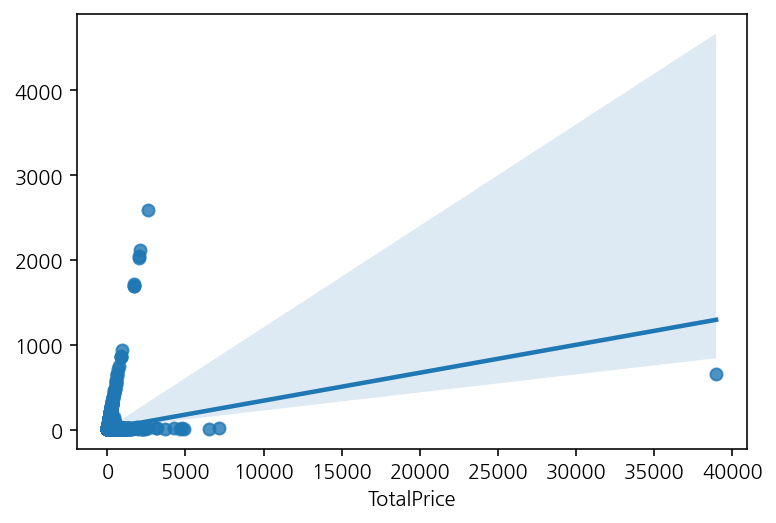

In [38]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred_sklearn)

<AxesSubplot:xlabel='TotalPrice'>

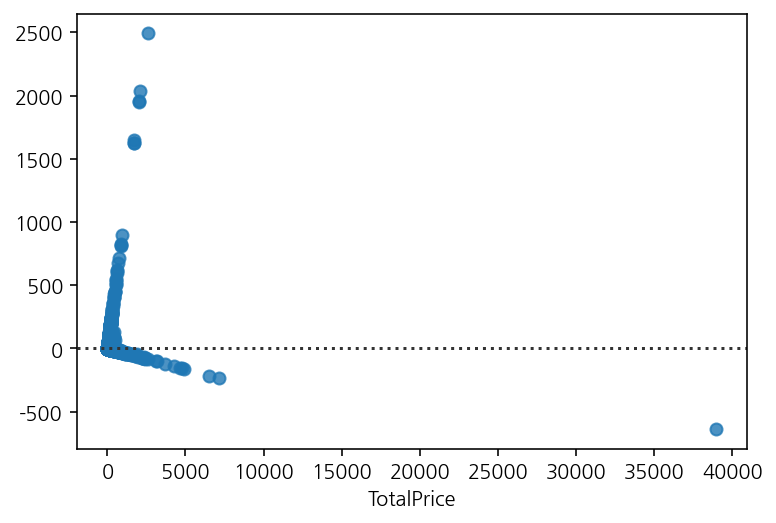

In [39]:
sns.residplot(x=y_test, y=y_pred_sklearn)

### R2 score 구하는 여러 가지 방법

In [90]:
# 결정 계수
# R² 계산 함수 정의
def calculate_r_squared(actual, predicted):
    mean_actual = np.mean(actual)
    total_variance = np.sum((actual - mean_actual)**2)
    explained_variance = np.sum((actual - predicted)**2)
    r_squared = 1 - explained_variance / total_variance
    return r_squared

# R² 계산
r_squared = calculate_r_squared(y_test, y_pred_sklearn)
r_squared

0.04493538481800252

In [41]:
model_sklearn.score(X_test, y_test)

0.04493538481800252

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(y_test, y_pred_sklearn)

0.04493538481800252

### 미션2 결과 해석
- 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석

- 결정계수 값이 0.0449로 나왔다 ➢ 관계 설명에 있어 회귀 모델의 설명력이 매우 낮음
       - 1에 가까울수록 모델이 데이터를 잘 설명
    1️⃣ 낮은 설명력 - 총 판매액의 변동을 약 4.49%만 설명할 수 있음 \
    2️⃣ 추가 변수 고려 필요성 - 경쟁 상품 가격, 경제 상황, 계절성 등? 다양한 변수 추가 고려 필요 \
    3️⃣ 모델 개선 필요 - 다른 종류 회귀 모델 시도
- 결론 
    - 상품가격과 총 판매액 사이에 직접적인 강력한 선형관계가 존재하지 않음
    - 복잡한 시장 동향 및 소비자 행동 반영하는 데 있어 다변량 분석과 같은 세밀한 접근 필요함을 시사

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [171]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] <= "2010-12-25") & (df_promotion["InvoiceDate"] >= "2010-12-18")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [172]:
df_promotion["IsChristmasProduct"].value_counts()

False    24556
True      1601
Name: IsChristmasProduct, dtype: int64

In [175]:
df_promotion.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False


1️⃣ 크리스마스 관련 상품과 비관련 상품의 판매 분석


In [179]:
# 필요한 라이브러리 불러오기
import pandas as pd


# 크리스마스 기간과 비교 기간 설정
christmas_period_start = "2010-12-18"
christmas_period_end = "2010-12-25"
comparison_period_start = "2010-12-01"
comparison_period_end = "2010-12-08"

# 크리스마스 기간 데이터 필터링
christmas_period_df = df_promotion[
    (df_promotion["InvoiceDate"] >= christmas_period_start) & 
    (df_promotion["InvoiceDate"] <= christmas_period_end)
]

# 비교 기간 데이터 필터링
comparison_period_df = df_promotion[
    (df_promotion["InvoiceDate"] >= comparison_period_start) & 
    (df_promotion["InvoiceDate"] <= comparison_period_end)
]

# 각 기간별 판매량 및 판매액 계산
christmas_sales_volume = christmas_period_df['Quantity'].sum()
christmas_sales_amount = christmas_period_df['TotalPrice'].sum()

comparison_sales_volume = comparison_period_df['Quantity'].sum()
comparison_sales_amount = comparison_period_df['TotalPrice'].sum()

# 결과 출력
print(f"크리스마스 기간 판매량: {christmas_sales_volume}, 판매액: {christmas_sales_amount}")
print(f"비교 기간 판매량: {comparison_sales_volume}, 판매액: {comparison_sales_amount}")


크리스마스 기간 판매량: 34548, 판매액: 53526.49999999999
비교 기간 판매량: 119380, 판매액: 234397.27999999997


- 결과해석
    - 고객 행동의 변화
        - 크리스마스 기간에는 소비자들이 특정 상품(예: 크리스마스 관련 상품)에 집중할 가능성이 있음
        - 이에 일반 상품에 대한 수요가 감소할 수 있음
    - 재고 및 공급의 제한: 크리스마스 기간 동안 특정 상품에 치중되어 일부 상품의 재고 부족이 발생할 수 있으며, 이는 판매량 감소로 이어질 수 있음
    - 프로모션 효과
        - 크리스마스 기간에 실시한 프로모션이 충분히 효과적이지 않았음
        - 고객이 기대하는 할인율이나 프로모션 혜택을 제공하지 못했을 가능성 시사

2️⃣ 프로모션 전략 개발

In [180]:
# 크리스마스 관련 상품 및 비관련 상품의 크리스마스 기간과 비교 기간 판매 데이터 분석
def analyze_sales_period(df, start_date, end_date, is_christmas_product):
    period_df = df[
        (df["InvoiceDate"] >= start_date) & 
        (df["InvoiceDate"] <= end_date) & 
        (df["IsChristmasProduct"] == is_christmas_product)
    ]
    sales_volume = period_df['Quantity'].sum()
    sales_amount = period_df['TotalPrice'].sum()
    return sales_volume, sales_amount

# 크리스마스 관련 상품 분석 (크리스마스 기간 vs 비교 기간)
christmas_related_volume_christmas, christmas_related_amount_christmas = analyze_sales_period(df_promotion, christmas_period_start, christmas_period_end, True)
christmas_related_volume_comparison, christmas_related_amount_comparison = analyze_sales_period(df_promotion, comparison_period_start, comparison_period_end, True)

# 크리스마스 비관련 상품 분석 (크리스마스 기간 vs 비교 기간)
non_christmas_related_volume_christmas, non_christmas_related_amount_christmas = analyze_sales_period(df_promotion, christmas_period_start, christmas_period_end, False)
non_christmas_related_volume_comparison, non_christmas_related_amount_comparison = analyze_sales_period(df_promotion, comparison_period_start, comparison_period_end, False)

# 결과 출력
print("크리스마스 관련 상품:")
print(f"크리스마스 기간 판매량: {christmas_related_volume_christmas}, 판매액: {christmas_related_amount_christmas}")
print(f"비교 기간 판매량: {christmas_related_volume_comparison}, 판매액: {christmas_related_amount_comparison}")

print("\n크리스마스 비관련 상품:")
print(f"크리스마스 기간 판매량: {non_christmas_related_volume_christmas}, 판매액: {non_christmas_related_amount_christmas}")
print(f"비교 기간 판매량: {non_christmas_related_volume_comparison}, 판매액: {non_christmas_related_amount_comparison}")


크리스마스 관련 상품:
크리스마스 기간 판매량: 437, 판매액: 727.7900000000001
비교 기간 판매량: 9373, 판매액: 13071.47

크리스마스 비관련 상품:
크리스마스 기간 판매량: 34111, 판매액: 52798.71
비교 기간 판매량: 110007, 판매액: 221325.81


- 결과 해석
    - 크리스마스 관련 상품: 크리스마스 기간 동안 판매량과 판매액이 증가했지만, 여전히 비교 기간에 비해 낮은 수준
    - 프로모션 전략이 더 강화되거나 타겟 마케팅이 더 집중되면 더 많은 성과를 얻을 수 있을 것

    - 크리스마스 비관련 상품: 크리스마스 기간 동안 판매량과 판매액이 상당히 높게 나타났음
    - 프로모션 전략의 성과가 양호하며, 추가적인 마케팅 노력이나 프로모션 향상이 더 큰 성과를 가져올 수 있을 것
   



프로모션 전략 개선 제안:
1. 크리스마스 관련 상품에 대한 프로모션 강화:

    - 할인율 증가 또는 추가 혜택 제공을 통해 크리스마스 관련 상품에 대한 고객 관심 높이기
    - 대상 고객을 세분화하여 특별 프로모션을 제공하고, 이를 마케팅 캠페인에 활용

2. 크리스마스 비관련 상품에 대한 지속적인 프로모션:

    - 현재의 프로모션 전략을 유지하면서 더 다양한 마케팅 채널을 활용하여 더 많은 소비자에게 도달
    - 충성 고객을 대상으로 한 특별 혜택을 제공하여 이들의 구매 촉진

3. 재고 관리 및 공급망 효율화:

    - 크리스마스 관련 상품과 비관련 상품의 수요 예측을 더 정확히 수행하여 재고를 최적화 필요
    -> 공급망 효율적으로 관리하여 고객에게 빠르고 정확한 서비스 제공

4. 마케팅 캠페인의 실적 모니터링:
    - 새로운 프로모션 전략이나 마케팅 캠페인을 시행한 후에는 성과를 지속적으로 모니터링하고, 데이터를 토대로 필요에 따라 조정한다

추가 논의 사항 ) 상품 분류와 기간 분류를 다르게 시도해봐야함

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [104]:
import statsmodels.formula.api as smf

In [145]:
df_promotion = pd.get_dummies(df_promotion, columns=["Country"])

In [151]:
df_promotion.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'InvoiceMonth', 'TotalPrice',
       'IsChristmasPeriod', 'IsChristmasProduct', 'Country_Australia',
       'Country_Austria', 'Country_Belgium', 'Country_Channel Islands',
       'Country_Cyprus', 'Country_Denmark', 'Country_EIRE', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_Iceland', 'Country_Italy',
       'Country_Japan', 'Country_Lithuania', 'Country_Netherlands',
       'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_United Kingdom'],
      dtype='object')

In [154]:
# 특성과 타겟 변수 선택
X = df_promotion.drop(["InvoiceNo", "StockCode", "Description", "CustomerID", "InvoiceDate", "Quantity"], axis=1)
y = df_promotion['Quantity']

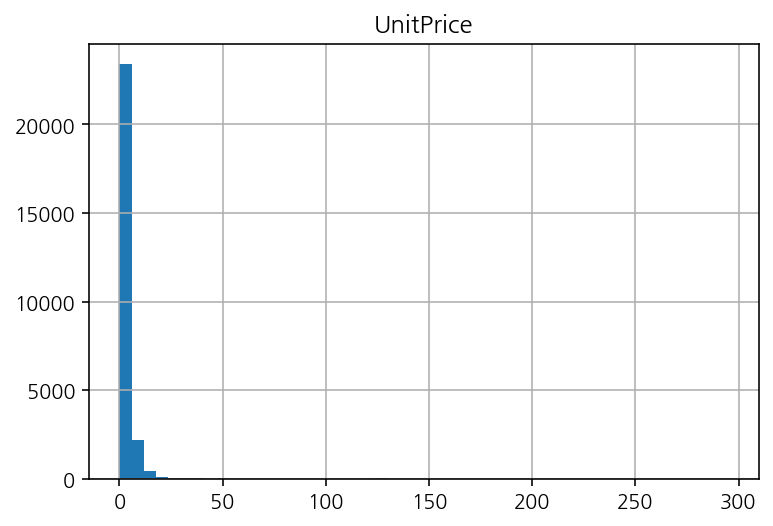

In [113]:
X.hist(bins=50);

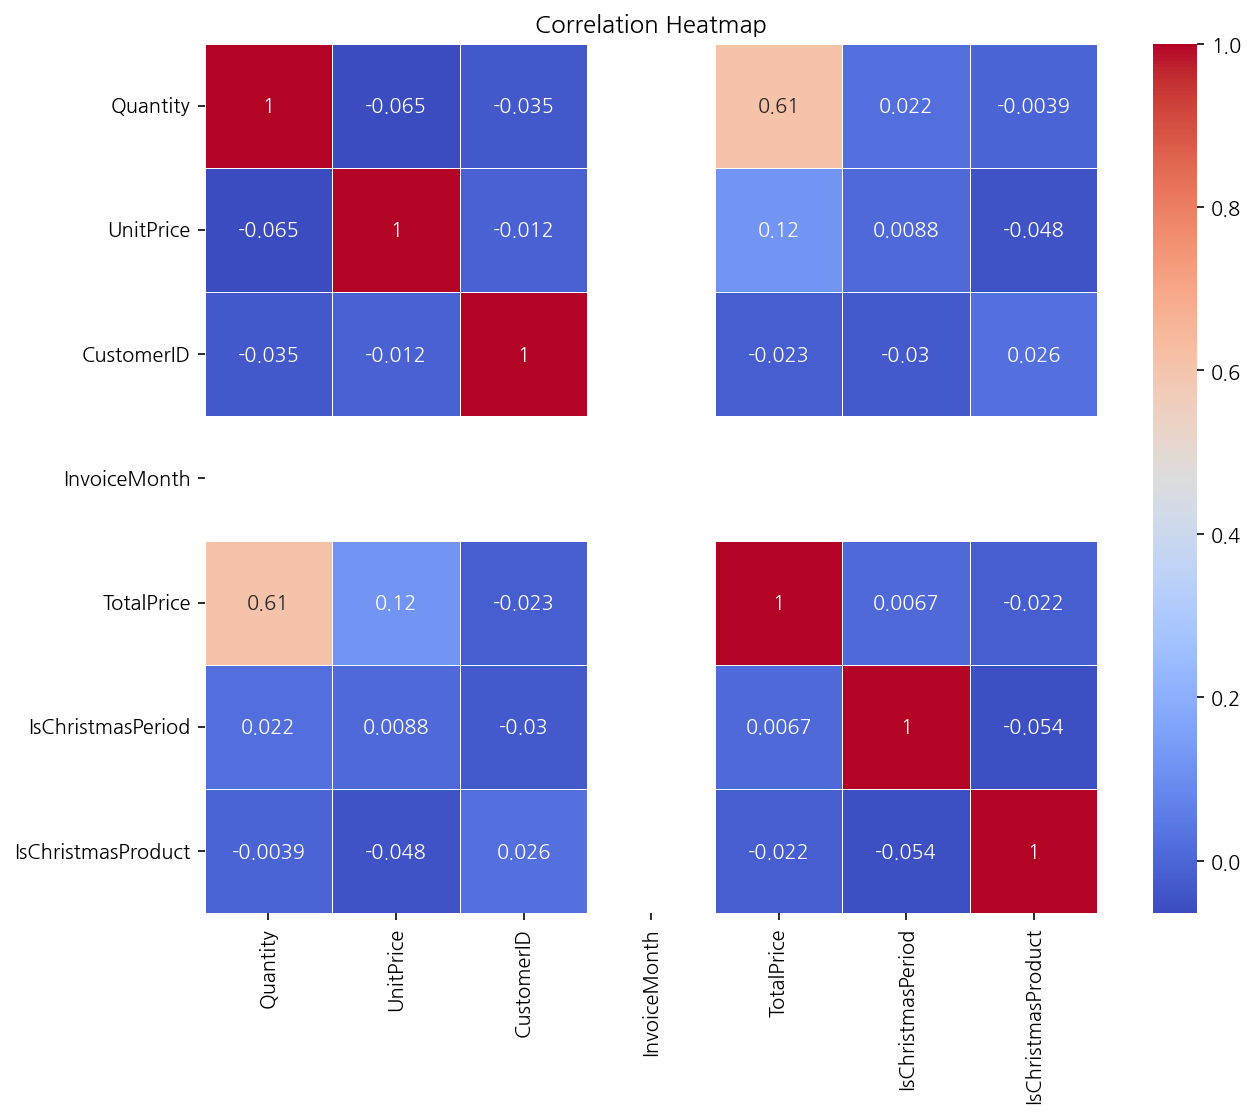

In [112]:
# 피처 간 상관관계 히트맵
correlation_matrix = df_promotion.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [114]:
X["UnitPrice"] = np.log1p(X["UnitPrice"])

/tmp/ipykernel_47/2524611194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["UnitPrice"] = np.log1p(X["UnitPrice"])


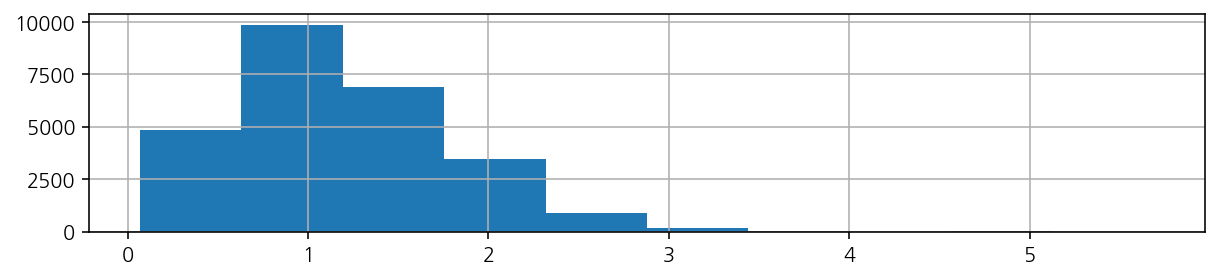

In [115]:
X["UnitPrice"].hist(figsize=(10, 2));

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.

* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.

In [124]:
df_promotion['Country'] = pd.to_numeric(df_promotion['Country'], errors='coerce')

In [131]:
df_promotion['IsChristmasProduct'] = df_promotion['IsChristmasProduct'].astype(int)

In [159]:
# 특성과 타겟 변수 선택
X = df_promotion.drop(["InvoiceNo", "StockCode", "Description", "CustomerID", "InvoiceDate", "Quantity"], axis=1)
y = df_promotion['Quantity']
y

0        6
1        6
2        8
3        6
4        6
        ..
42448    1
42449    1
42450    1
42451    2
42452    2
Name: Quantity, Length: 26157, dtype: int32

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다변량 회귀분석
import statsmodels.api as sm
X_train_int = X_train.astype(int)
X_train_ols = sm.add_constant(X_train_int)
# # 상수항 추가
# X_train_ols = sm.add_constant(X_train)

# OLS 모델 피팅
model_ols = sm.OLS(y_train, X_train_ols).fit()

In [161]:
print(X_train_ols.dtypes)
print(y_train.dtype)


UnitPrice                  float64
InvoiceMonth                 int64
TotalPrice                 float64
IsChristmasPeriod             bool
IsChristmasProduct            bool
Country_Australia            uint8
Country_Austria              uint8
Country_Belgium              uint8
Country_Channel Islands      uint8
Country_Cyprus               uint8
Country_Denmark              uint8
Country_EIRE                 uint8
Country_Finland              uint8
Country_France               uint8
Country_Germany              uint8
Country_Iceland              uint8
Country_Italy                uint8
Country_Japan                uint8
Country_Lithuania            uint8
Country_Netherlands          uint8
Country_Norway               uint8
Country_Poland               uint8
Country_Portugal             uint8
Country_Spain                uint8
Country_Sweden               uint8
Country_Switzerland          uint8
Country_United Kingdom       uint8
dtype: object
int32


In [163]:
X.isna().mean()

UnitPrice                  0.0
InvoiceMonth               0.0
TotalPrice                 0.0
IsChristmasPeriod          0.0
IsChristmasProduct         0.0
Country_Australia          0.0
Country_Austria            0.0
Country_Belgium            0.0
Country_Channel Islands    0.0
Country_Cyprus             0.0
Country_Denmark            0.0
Country_EIRE               0.0
Country_Finland            0.0
Country_France             0.0
Country_Germany            0.0
Country_Iceland            0.0
Country_Italy              0.0
Country_Japan              0.0
Country_Lithuania          0.0
Country_Netherlands        0.0
Country_Norway             0.0
Country_Poland             0.0
Country_Portugal           0.0
Country_Spain              0.0
Country_Sweden             0.0
Country_Switzerland        0.0
Country_United Kingdom     0.0
dtype: float64

* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.

In [165]:
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     572.3
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        05:05:18   Log-Likelihood:            -1.0503e+05
No. Observations:               20925   AIC:                         2.101e+05
Df Residuals:                   20899   BIC:                         2.103e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
UnitPrice                 

- **분석 과정과 결과**
    - Adj. R-squared: 0.406(독립 변수의 수를 고려하여 조정된 값) 
        - 독립 변수가 많을수록 일반 R-제곱 값에 비해 낮아질 수 있음. R-제곱과 거의 차이가 없으므로, 모델에 불필요한 변수가 많지 않음을 시사
    - UnitPrice: -1.1443. UnitPrice가 1 단위 증가할 때마다 Quantity는 평균적으로 약 -1.1443 단위 감소
        - 이 변수 매우 유의미(p-value 거의 0)
    - TotalPrice: 0.3774. TotalPrice가 1 단위 증가할 때마다 Quantity는 평균적으로 약 0.3774 단위 증가
        - 이 변수도 매우 유의미
    - IsChristmasPeriod, IsChristmasProduct, Country_Australia, 등 다수의 변수들은 Quantity 예측에 포함되어 있으나, 모든 변수가 통계적으로 유의미한 것은 아님. 예를 들어, IsChristmasPeriod의 p-value는 0.103으로, 일반적인 유의 수준 0.05에서는 유의미하지 않음.

- **주요 발견사항**   
1️⃣ TotalPrice는 판매량(Quantity)에 긍정적인 영향을 미치며, 이는 높은 구매 가치가 더 많은 상품 구매로 이어질 수 있음을 시사 \
2️⃣ UnitPrice의 영향은 부정적이며, 단가가 높을수록 구매량이 감소하는 경향 있음 \
3️⃣ IsChristmasPeriod 변수는 통계적으로 유의미하지 않았으나, 이는 분석 샘플의 한계 또는 기타 외부 요인의 영향일 수 있음 \
4️⃣ 특정 국가들은 판매량에 유의미한 영향 → 지역별 맞춤 전략이 필요


**[비즈니스 전략에 대한 권장 사항 포함하는 보고서] : 크리스마스 시즌 판매 전략** \
1️⃣ 가격 전략 
   - UnitPrice가 구매량에 부정적인 영향을 미침 고려
   - 크리스마스 시즌 동안 특별 할인이나 프로모션을 제공하여 고객의 구매욕구를 자극하는 전략이 유효할 것
     
2️⃣ 가치 기반 판매 
   - TotalPrice와 Quantity 사이의 긍정적 관계를 활용하여, 더 높은 가치의 구매를 유도하는 번들 판매나 가치 팩을 제공하는 방법
     
3️⃣ 지역 맞춤 전략
   - 지역별 판매량 차이 고려하여, 특정 국가나 지역을 대상으로 한 맞춤형 마케팅 캠페인을 실시
   - eg) 판매량이 높은 국가에는 추가 인센티브를, 낮은 국가에는 특별 프로모션을 제공
    
4️⃣ 크리스마스 시즌 마케팅 강화
  - 크리스마스 기간 동안의 구매를 더욱 자극하기 위해, 크리스마스 관련 제품이나 선물 세트에 초점을 맞춘 마케팅 활동을 강화

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6720
True     2028
Name: Target, dtype: int64

In [49]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']

3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8748 entries, 0 to 541888
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     8748 non-null   category      
 1   StockCode     8748 non-null   category      
 2   Description   8748 non-null   category      
 3   Quantity      8748 non-null   int32         
 4   InvoiceDate   8748 non-null   datetime64[ns]
 5   UnitPrice     8748 non-null   float64       
 6   CustomerID    8748 non-null   float32       
 7   Country       8748 non-null   object        
 8   InvoiceMonth  8748 non-null   int64         
 9   TotalPrice    8748 non-null   float64       
 10  Target        8748 non-null   bool          
dtypes: bool(1), category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


In [51]:
df.isna().mean()

InvoiceNo       0.0
StockCode       0.0
Description     0.0
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID      0.0
Country         0.0
InvoiceMonth    0.0
TotalPrice      0.0
Target          0.0
dtype: float64

In [52]:
# 날짜형 변수 변경
df["d_InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

Text(0, 0.5, 'Frequency')

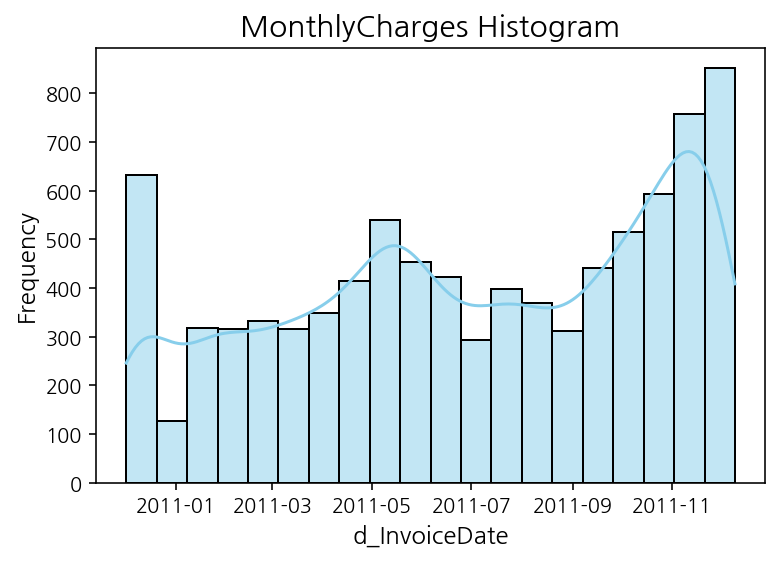

In [53]:
sns.histplot(df['d_InvoiceDate'], kde=True, color="skyblue", edgecolor="black")
plt.title('MonthlyCharges Histogram', fontsize=15)
plt.xlabel('d_InvoiceDate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [54]:
df["d_InvoiceDate"].value_counts()

2011-12-05 17:17:00    20
2011-11-14 15:27:00    19
2011-11-23 13:39:00    16
2011-04-28 10:20:00    16
2011-07-18 12:19:00    13
                       ..
2011-07-29 13:39:00     1
2011-07-29 14:55:00     1
2011-07-29 15:59:00     1
2011-03-11 10:31:00     1
2011-06-23 19:46:00     1
Name: d_InvoiceDate, Length: 4842, dtype: int64

In [55]:
# 연
df["year_InvoiceDate"] = df['InvoiceDate'].dt.year
df["year_InvoiceDate"].value_counts()

2011    8078
2010     670
Name: year_InvoiceDate, dtype: int64

In [56]:
# 월
df["month_InvoiceDate"] = df['InvoiceDate'].dt.month
df["month_InvoiceDate"].value_counts()

11    1275
12    1046
10     916
5      893
9      703
6      616
4      602
7      598
8      568
3      567
1      532
2      432
Name: month_InvoiceDate, dtype: int64

In [57]:
# 일
df["day_InvoiceDate"] = df['InvoiceDate'].dt.day
df["day_InvoiceDate"].value_counts()

5     365
8     364
6     362
11    362
7     356
1     335
23    328
10    326
14    314
18    299
12    298
16    296
13    293
20    287
17    283
24    282
4     279
9     279
28    276
2     276
22    276
21    254
15    249
3     248
30    242
25    238
19    237
27    226
29    187
26    185
31    146
Name: day_InvoiceDate, dtype: int64

In [58]:
df["hour_InvoiceDate"] = df["d_InvoiceDate"].dt.hour
df["hour_InvoiceDate"].value_counts()

12    1548
13    1401
14    1135
11    1043
15    1014
10     913
16     548
9      494
17     283
8      194
19      78
18      63
20      20
7       14
Name: hour_InvoiceDate, dtype: int64

In [59]:
# 원핫인코딩
df = pd.get_dummies(df, columns=["Country"])

In [60]:
df_ = df.drop(columns=["InvoiceNo", "InvoiceDate", "d_InvoiceDate"])

4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7274285714285714
              precision    recall  f1-score   support

       False       0.77      0.92      0.84      1344
        True       0.26      0.09      0.14       406

    accuracy                           0.73      1750
   macro avg       0.51      0.51      0.49      1750
weighted avg       0.65      0.73      0.68      1750



- 평가 결과 요약
    - 정확도(Accuracy): 모델의 정확도는 약 72.74%. 전체 데이터 중 약 73%의 구매 여부를 올바르게 예측했음을 의미
    - 정밀도(Precision)와 재현율(Recall):
    - False (미구매): 정밀도는 77%, 재현율은 92%로, 미구매 예측의 정확성과 민감도가 상대적으로 높음
    - True (구매): 정밀도는 26%, 재현율은 9%로, 구매 예측의 정확성과 민감도가 상대적으로 낮음 
   

- 해석 :
모델의 전체적인 정확도는 비교적 높지만, 구매하는 경우(True)의 예측 성능(정밀도와 재현율)이 상당히 낮음. 이는 모델이 '미구매' 클래스를 예측하는 데는 뛰어나지만, 실제로 '구매'하는 경우를 잘 포착하지 못함을 의미함

- 전략적 권장 사항 : 모델 성능 개선
    - 추가 데이터 수집: 구매 패턴을 더 잘 이해하기 위해 더 많은 데이터를 수집
    - 특성 공학: 기존 변수의 조합이나 새로운 변수를 도입하여 모델의 예측력을 향상
    - 다양한 모델 실험: 로지스틱 회귀 외에도 랜덤 포레스트, 그래디언트 부스팅 등 다른 알고리즘을 시도해보기